In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df2 = pd.read_csv("C:/Users/Faith/Downloads/bquxjob_103d478d_18e39afc968.csv")
df2.head(5)

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,2604346,HJ200978,2003-02-23 07:27:01.000000 UTC,003XX S JEFFERSON ST,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,ALLEY,False,False,...,2.0,28.0,02,1172382.0,1898709.0,2003,2018-02-28 03:56:25.000000 UTC,41.877502,-87.642520,"(41.877502477, -87.642520263)"
1,1668915,G456274,2001-07-26 02:30:00.000000 UTC,002XX S CANAL ST,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,PARKING LOT/GARAGE(NON.RESID.),False,False,...,NaN,NaN,02,1173132.0,1899349.0,2001,2015-08-17 03:03:40.000000 UTC,41.879242,-87.639747,"(41.879242081, -87.639747498)"
2,12524528,JE424952,2021-10-27 10:45:00.000000 UTC,0000X W RANDOLPH ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,42.0,32.0,02,1176102.0,1901284.0,2021,2021-11-03 03:42:44.000000 UTC,41.884485,-87.628784,"(41.884485451, -87.628783943)"
3,9797558,HX446760,2013-09-23 10:00:00.000000 UTC,0000X E WACKER DR,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,1176971.0,1902537.0,2013,2018-02-10 03:50:01.000000 UTC,41.887904,-87.625555,"(41.887904127, -87.625554948)"
4,11308464,JB254831,2018-04-28 08:30:00.000000 UTC,002XX N STATE ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,1176327.0,1901797.0,2018,2018-05-10 03:46:13.000000 UTC,41.885888,-87.627942,"(41.885888079, -87.627942238)"


In [3]:
df2.columns

Index(['unique_key', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [4]:
#Missing values
df2.isnull().sum()

unique_key               0
case_number              0
date                     0
block                    0
iucr                     0
primary_type             0
description              0
location_description     2
arrest                   0
domestic                 0
beat                     0
district                 0
ward                    61
community_area          62
fbi_code                 0
x_coordinate            13
y_coordinate            13
year                     0
updated_on               0
latitude                13
longitude               13
location                13
dtype: int64

In [5]:
df2.dtypes

unique_key                int64
case_number              object
date                     object
block                    object
iucr                     object
primary_type             object
description              object
location_description     object
arrest                     bool
domestic                   bool
beat                      int64
district                  int64
ward                    float64
community_area          float64
fbi_code                 object
x_coordinate            float64
y_coordinate            float64
year                      int64
updated_on               object
latitude                float64
longitude               float64
location                 object
dtype: object

In [6]:
#Handling missing values
#a) Replacing location_description,ward, community_area and location with "N/A"

df2['location_description'].fillna('N/A', inplace=True)
df2['ward'].fillna('N/A', inplace=True)
df2['community_area'].fillna('N/A', inplace=True)
df2['location'].fillna('N/A', inplace=True)

In [7]:
#b) Replacing x_coordinate, y_coordinate, latitude and longitude with "0"

df2['x_coordinate'].fillna(0, inplace=True)
df2['y_coordinate'].fillna(0, inplace=True)
df2['latitude'].fillna(0, inplace=True)
df2['longitude'].fillna(0, inplace=True)

In [8]:
df2.head() 

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,2604346,HJ200978,2003-02-23 07:27:01.000000 UTC,003XX S JEFFERSON ST,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,ALLEY,False,False,...,2.0,28.0,02,1172382.0,1898709.0,2003,2018-02-28 03:56:25.000000 UTC,41.877502,-87.642520,"(41.877502477, -87.642520263)"
1,1668915,G456274,2001-07-26 02:30:00.000000 UTC,002XX S CANAL ST,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,PARKING LOT/GARAGE(NON.RESID.),False,False,...,N/A,N/A,02,1173132.0,1899349.0,2001,2015-08-17 03:03:40.000000 UTC,41.879242,-87.639747,"(41.879242081, -87.639747498)"
2,12524528,JE424952,2021-10-27 10:45:00.000000 UTC,0000X W RANDOLPH ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,42.0,32.0,02,1176102.0,1901284.0,2021,2021-11-03 03:42:44.000000 UTC,41.884485,-87.628784,"(41.884485451, -87.628783943)"
3,9797558,HX446760,2013-09-23 10:00:00.000000 UTC,0000X E WACKER DR,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,1176971.0,1902537.0,2013,2018-02-10 03:50:01.000000 UTC,41.887904,-87.625555,"(41.887904127, -87.625554948)"
4,11308464,JB254831,2018-04-28 08:30:00.000000 UTC,002XX N STATE ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,1176327.0,1901797.0,2018,2018-05-10 03:46:13.000000 UTC,41.885888,-87.627942,"(41.885888079, -87.627942238)"


In [9]:
#Checking if the missing values have been replaced

df2.isnull().sum()

unique_key              0
case_number             0
date                    0
block                   0
iucr                    0
primary_type            0
description             0
location_description    0
arrest                  0
domestic                0
beat                    0
district                0
ward                    0
community_area          0
fbi_code                0
x_coordinate            0
y_coordinate            0
year                    0
updated_on              0
latitude                0
longitude               0
location                0
dtype: int64

1). From what date is the oldest data point in the data set? 

In [10]:
# Converting the 'date' column to datetime format
df2['date'] = pd.to_datetime(df2['date'])

# Find the oldest date
oldest_date = df2['date'].min()

print("The oldest date in the dataset is:", oldest_date)

The oldest date in the dataset is: 2001-01-05 03:45:00+00:00


2). Which year had the largest amount of crimes and how many crimes were committed that year?

In [11]:
# Grouping the data by the 'year' column and count the occurrences of each year
crime_count_by_year = df2.groupby('year').size()

# Find the year with the largest number of crimes and the corresponding count
max_crime_year = crime_count_by_year.idxmax()
max_crime_count = crime_count_by_year.max()

print("Year with the largest number of crimes:", max_crime_year)
print("Number of crimes committed that year:", max_crime_count)

Year with the largest number of crimes: 2019
Number of crimes committed that year: 80


3). Let's define "Arrest Rate" as the share of crimes that led to an arrest.
What were the five most common crimes in 2020? Which of those has the highest and lowest arrest rate?

In [12]:
# First filter the data for the year 2020
crime_2020 = df2[df2['year'] == 2020]

# Then group the data by the 'primary_type' column and count the occurrences of each crime type
crime_count = crime_2020['primary_type'].value_counts()

# Find the five most common crimes in 2020
top_5_crimes = crime_count.head(5).index.tolist()

# Calculating the arrest rate for each of the top 5 crimes
arrest_rate_by_crime = {}
for crime_type in top_5_crimes:
    total_crimes = len(crime_2020[crime_2020['primary_type'] == crime_type])
    total_arrests = len(crime_2020[(crime_2020['primary_type'] == crime_type) & (crime_2020['arrest'] == True)])
    arrest_rate = total_arrests / total_crimes if total_crimes > 0 else 0
    arrest_rate_by_crime[crime_type] = arrest_rate

# Finding the crime with the highest and lowest arrest rates among the top 5 crimes
highest_arrest_rate = max(arrest_rate_by_crime, key=arrest_rate_by_crime.get)
lowest_arrest_rate = min(arrest_rate_by_crime, key=arrest_rate_by_crime.get)

#Printing the output
print("Five most common crimes in 2020:", top_5_crimes)
print("Crime with the highest arrest rate among the top 5 crimes:", highest_arrest_rate)
print("Crime with the lowest arrest rate among the top 5 crimes:", lowest_arrest_rate)


Five most common crimes in 2020: ['THEFT', 'ROBBERY', 'BATTERY', 'ASSAULT', 'BURGLARY']
Crime with the highest arrest rate among the top 5 crimes: BURGLARY
Crime with the lowest arrest rate among the top 5 crimes: ROBBERY


4). What year had the highest arrest rate? Plot the number of crimes per year and comment on the trend.

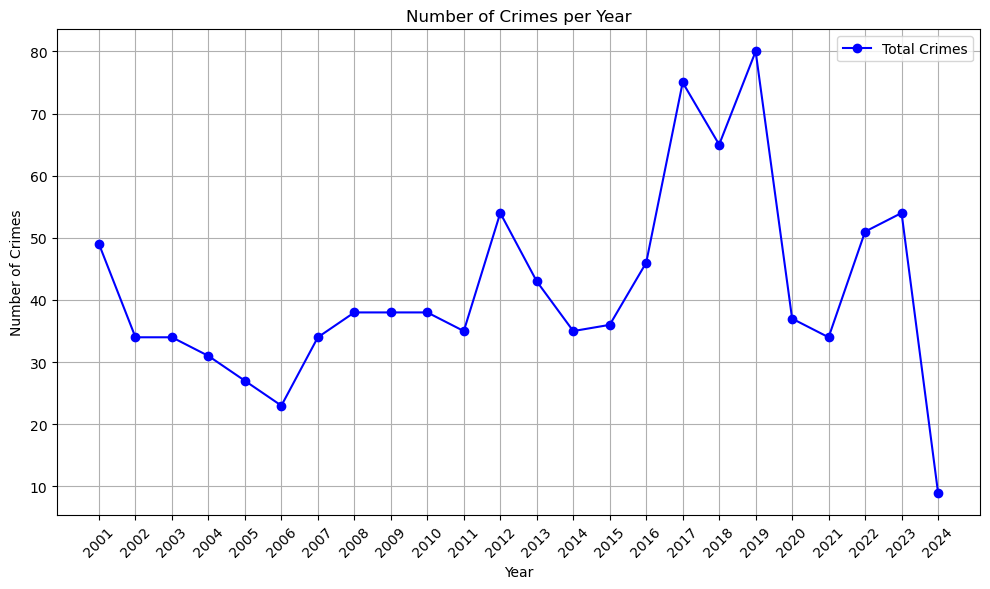

In [13]:
# Grouping the data by year and count the total number of crimes and arrests for each year
crime_by_year = df2.groupby('year').agg({'primary_type': 'count', 'arrest': 'sum'})
crime_by_year.rename(columns={'primary_type': 'total_crimes', 'arrest': 'total_arrests'}, inplace=True)

# Calculating the arrest rate for each year
crime_by_year['arrest_rate'] = crime_by_year['total_arrests'] / crime_by_year['total_crimes']

# Finding the year with the highest arrest rate
highest_arrest_rate_year = crime_by_year['arrest_rate'].idxmax()
highest_arrest_rate = crime_by_year.loc[highest_arrest_rate_year, 'arrest_rate']

# Plot the number of crimes per year
plt.figure(figsize=(10, 6))
plt.plot(crime_by_year.index, crime_by_year['total_crimes'], marker='o', color='blue', label='Total Crimes')
plt.title('Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(crime_by_year.index, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

5). Which year had the most number of crimes leading to an arrest? How many arrests were made during that year? Plot the trend for total number of arrests per year.

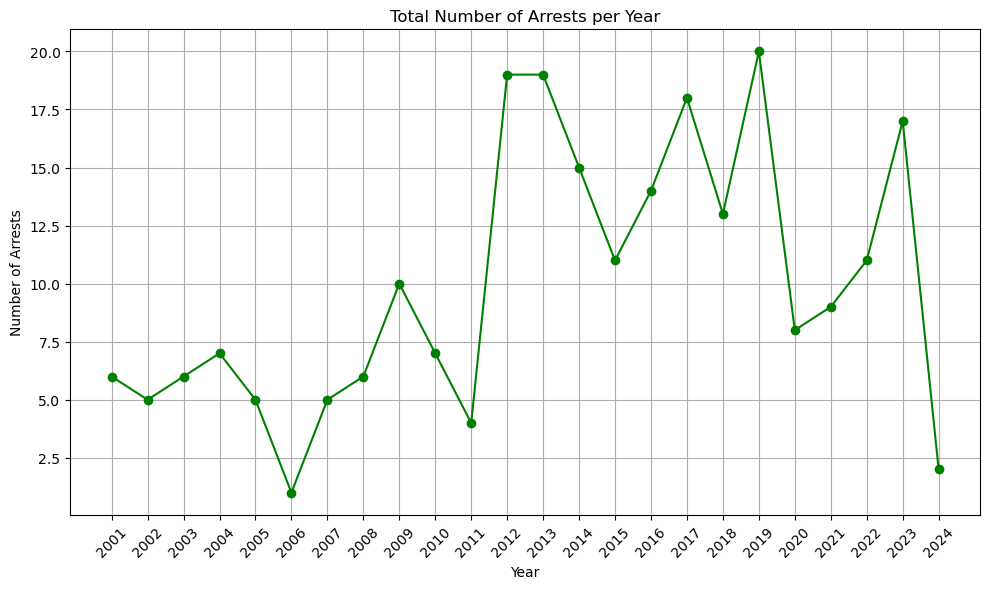

The year with the most number of crimes leading to an arrest is 2019 with 20 arrests.


In [14]:
# Grouping the data by year and count the total number of arrests for each year
yearly_arrests = df2.groupby('year')['arrest'].sum()

# Finding the year with the most number of arrests
year_most_arrests = yearly_arrests.idxmax()
most_arrests = yearly_arrests.max()

# Plotting the trend for total number of arrests per year
plt.figure(figsize=(10, 6))
plt.plot(yearly_arrests.index, yearly_arrests, marker='o', color='green')
plt.title('Total Number of Arrests per Year')
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.xticks(yearly_arrests.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"The year with the most number of crimes leading to an arrest is {year_most_arrests} with {most_arrests} arrests.")


6). How has the arrest rate looked like over time? 
- Plot the trend of the arrest rate.
- Between which years can you see the biggest change in "Arrest Rate"?
- Can you point at specific reasons to why the Arrest Rate dropped between those years? Comment on your conclusions.

> Since the data set is constantly updating, disregard the year 2021 and later for the analysis in this question.

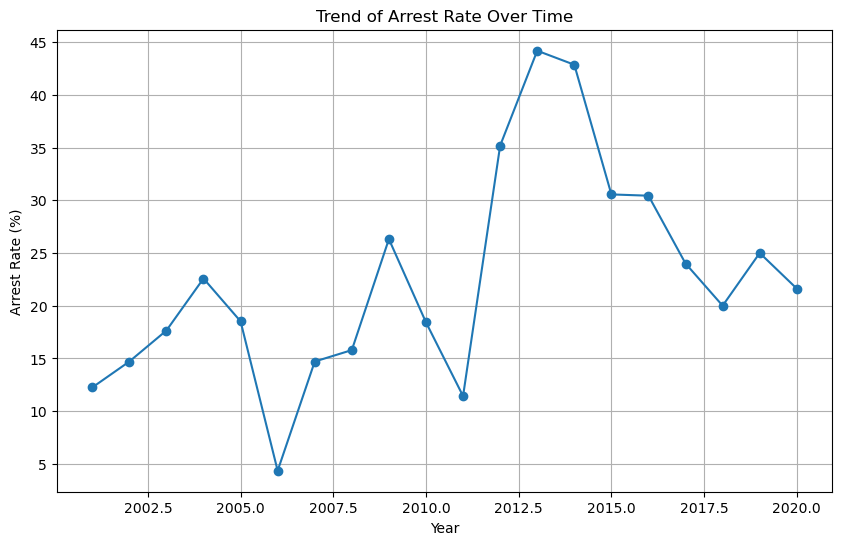

Year with the biggest change in arrest rate: 2012
Biggest change in arrest rate: 23.756613756613753


In [15]:
# Filtering the dataset to exclude data from 2021 and later
filtered_df = df2[df2['year'] < 2021]

# Then calculate the total number of crimes and arrests for each year
crime_counts = filtered_df.groupby('year').size()
arrest_counts = filtered_df[filtered_df['arrest'] == True].groupby('year').size()

# Calculate the arrest rate for each year
arrest_rate = (arrest_counts / crime_counts) * 100

# Plotting the trend of the arrest rate over time
plt.figure(figsize=(10, 6))
plt.plot(arrest_rate.index, arrest_rate.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Arrest Rate (%)')
plt.title('Trend of Arrest Rate Over Time')
plt.grid(True)
plt.show()

# Identify the years with the biggest changes in arrest rate
max_change_year = arrest_rate.diff().abs().idxmax()
max_change = arrest_rate.diff().abs().max()

print("Year with the biggest change in arrest rate:", max_change_year)
print("Biggest change in arrest rate:", max_change)


Conclusion
The graph illustrates the trend of arrest rate over time. Initially, there is a gradual increase in arrests from 2001 to around 2004, followed by a relatively stable period until approximately 2013. From 2013 onwards, there is a notable decline in the arrest rate, reaching a low point around 2017. The trend then appears to plateau until the end of the dataset.

This decline in arrests from around 2014 could be attributed to various factors, such as changes in law enforcement policies, shifts in crime rates, or alterations in reporting practices.